In [128]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from src.utils import load, add_variables, clean_data
from src.ploting import BoxPlot, LinearPlot, DistPlot, BarPlot, HistPlot, ACFPlot

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 50)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dodawanie zmiennych

In [129]:

CURR = "EURUSD"
INTER = "15m"
WEEKDAY_CODES = ["weekday_0", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6"]
HOUR_CODES = [f"hour_{i}" for i in range(24)]
OHLCV = ['Open', 'High', 'Low', 'Close', 'Volume']
INDICATORS = ['roi_1', 'roi_3', 'roi_5', 'roi_10', 'roi_20', 'candle_body_size', 'vol_change_1', 'vol_change_2',
              'vol_change_3', 'sma_50', 'sma_200', 'candle_size', 'impulse']
ROI = ['roi_1', 'roi_3', 'roi_5', 'roi_10', 'roi_20']
LABELS = ['target_value', 'target_direction']

In [130]:
# load data
data = load(currency=CURR, interval=INTER)
data = add_variables(data)
data.head()

Open      Low     High    Close  Volume     roi_1  \
Datetime                                                                    
2011-08-17 17:45:00  1.43987  1.43951  1.44030  1.43994  1508.0       NaN   
2011-08-17 18:00:00  1.43994  1.43898  1.44007  1.43919  1182.0 -0.000521   
2011-08-17 18:15:00  1.43919  1.43884  1.43953  1.43914  1098.0 -0.000035   
2011-08-17 18:30:00  1.43914  1.43913  1.44045  1.44015  1042.0  0.000702   
2011-08-17 18:45:00  1.44015  1.43938  1.44032  1.43943   878.0 -0.000500   

                        roi_3  roi_5  roi_10  roi_20  candle_body_size  \
Datetime                                                                 
2011-08-17 17:45:00       NaN    NaN     NaN     NaN          0.088577   
2011-08-17 18:00:00       NaN    NaN     NaN     NaN         -0.687992   
2011-08-17 18:15:00       NaN    NaN     NaN     NaN         -0.072564   
2011-08-17 18:30:00  0.000146    NaN     NaN     NaN          0.765195   
2011-08-17 18:45:00  0.000167    NaN     NaN     NaN         -0.766011   

                     vol_change_1  vol_change_2  vol_change_3  sma_50  \
Datetime                                                                
2011-08-17 17:45:00           NaN           NaN           NaN     NaN   
2011-08-17 18:00:00     -0.216180           NaN           NaN     NaN   
2011-08-17 18:15:00     -0.071066     -0.271883           NaN     NaN   
2011-08-17 18:30:00     -0.051002     -0.118443     -0.309019     NaN   
2011-08-17 18:45:00     -0.157390     -0.200364     -0.257191     NaN   

                     sma_200  target_value  target_direction  candle_size  \
Datetime                                                                    
2011-08-17 17:45:00      NaN       1.43919                 1      0.00079   
2011-08-17 18:00:00      NaN       1.43914                 1      0.00109   
2011-08-17 18:15:00      NaN       1.44015                 0      0.00069   
2011-08-17 18:30:00      NaN       1.43943                 1      0.00132   
2011-08-17 18:45:00      NaN       1.43969                 1      0.00094   

                     impulse        hour_0        hour_1        hour_2  \
Datetime                                                                 
2011-08-17 17:45:00        0  6.743271e-24  1.122277e-30  2.527789e-38   
2011-08-17 18:00:00        0  9.469196e-18  1.270271e-23  2.306167e-30   
2011-08-17 18:15:00        0  9.469196e-18  1.270271e-23  2.306167e-30   
2011-08-17 18:30:00        0  9.469196e-18  1.270271e-23  2.306167e-30   
2011-08-17 18:45:00        0  9.469196e-18  1.270271e-23  2.306167e-30   

                           hour_3  hour_4  ...  hour_6        hour_7  \
Datetime                                   ...                         
2011-08-17 17:45:00  0.000000e+00     0.0  ...     0.0  1.492243e-41   
2011-08-17 18:00:00  5.666255e-38     0.0  ...     0.0  0.000000e+00   
2011-08-17 18:15:00  5.666255e-38     0.0  ...     0.0  0.000000e+00   
2011-08-17 18:30:00  5.666255e-38     0.0  ...     0.0  0.000000e+00   
2011-08-17 18:45:00  5.666255e-38     0.0  ...     0.0  0.000000e+00   

                           hour_8        hour_9       hour_10       hour_11  \
Datetime                                                                      
2011-08-17 17:45:00  1.449098e-33  1.904368e-26  3.386997e-20  8.152485e-15   
2011-08-17 18:00:00  6.410940e-42  6.790282e-34  9.734319e-27  1.888575e-20   
2011-08-17 18:15:00  6.410940e-42  6.790282e-34  9.734319e-27  1.888575e-20   
2011-08-17 18:30:00  6.410940e-42  6.790282e-34  9.734319e-27  1.888575e-20   
2011-08-17 18:45:00  6.410940e-42  6.790282e-34  9.734319e-27  1.888575e-20   

                          hour_12       hour_13       hour_14   hour_15  \
Datetime                                                                  
2011-08-17 17:45:00  2.655682e-10  1.170775e-06  6.985242e-04  0.056403   
2011-08-17 18:00:00  4.958773e-15  1.762078e-10  8.473971e-07  0.000552   
2011-08-17 18:15:00  4.958773e-15  

In [131]:
# clean data
data = clean_data(data)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277135 entries, 2011-08-21 20:00:00 to 2022-10-25 16:30:00
Data columns (total 51 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open              277135 non-null  float32
 1   Low               277135 non-null  float32
 2   High              277135 non-null  float32
 3   Close             277135 non-null  float32
 4   Volume            277135 non-null  float32
 5   roi_1             277135 non-null  float32
 6   roi_3             277135 non-null  float32
 7   roi_5             277135 non-null  float32
 8   roi_10            277135 non-null  float32
 9   roi_20            277135 non-null  float32
 10  candle_body_size  277135 non-null  float32
 11  vol_change_1      277135 non-null  float32
 12  vol_change_2      277135 non-null  float32
 13  vol_change_3      277135 non-null  float32
 14  sma_50            277135 non-null  float64
 15  sma_200           277135 non-null 

## Podstawowe statystyki opisowe

OHLC statystyki

In [72]:
data[OHLCV].describe()

Open           High            Low          Close  \
count  277135.000000  277135.000000  277135.000000  277135.000000   
mean        1.187432       1.187841       1.187017       1.187430   
std         0.100096       0.100106       0.100093       0.100096   
min         0.954460       0.955200       0.953570       0.954520   
25%         1.113840       1.114210       1.113510       1.113840   
50%         1.164200       1.164550       1.163840       1.164200   
75%         1.272950       1.273405       1.272490       1.272950   
max         1.454160       1.454810       1.453520       1.454150   

              Volume  
count  277135.000000  
mean     2325.258789  
std      2319.200928  
min         0.000000  
25%       862.000000  
50%      1661.000000  
75%      3044.000000  
max     55767.000000

Indicators statystyki

In [73]:
data[INDICATORS].describe()


roi_1          roi_3          roi_5         roi_10  \
count  277135.000000  277135.000000  277135.000000  277135.000000   
mean       -0.000001      -0.000003      -0.000005      -0.000012   
std         0.000540       0.000924       0.001188       0.001670   
min        -0.014314      -0.016666      -0.023794      -0.026821   
25%        -0.000214      -0.000364      -0.000473      -0.000685   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000212       0.000360       0.000465       0.000671   
max         0.019570       0.018613       0.030495       0.029392   

              roi_20  candle_body_size   vol_change_1   vol_change_2  \
count  277135.000000     277135.000000  277135.000000  277135.000000   
mean       -0.000024         -0.001766       0.252285       0.420266   
std         0.002350          0.513283      10.963066      21.709888   
min        -0.039656         -1.000000      -1.000000      -1.000000   
25%        -0.001029         -0.438519      -0.205197      -0.251794   
50%         0.000000          0.000000      -0.014914      -0.018815   
75%         0.001010          0.433377       0.245746       0.322761   
max         0.036127          1.000000    4537.000000    9034.000000   

        vol_change_3         sma_50        sma_200    candle_size  \
count  277135.000000  277135.000000  277135.000000  277135.000000   
mean        0.531365       1.187469       1.187592       0.000824   
std        25.082771       0.100090       0.100068       0.000672   
min        -1.000000       0.956113       0.960372       0.000010   
25%        -0.280112       1.113970       1.114225       0.000420   
50%        -0.021334       1.164228       1.164420       0.000650   
75%         0.371965       1.272990       1.273303       0.001020   
max     10491.000000       1.451746       1.448791       0.025560   

             impulse  
count  277135.000000  
mean        0.086236  
std         0.280713  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

## Korelacje pomiedzy zmiennymi

<Axes: >

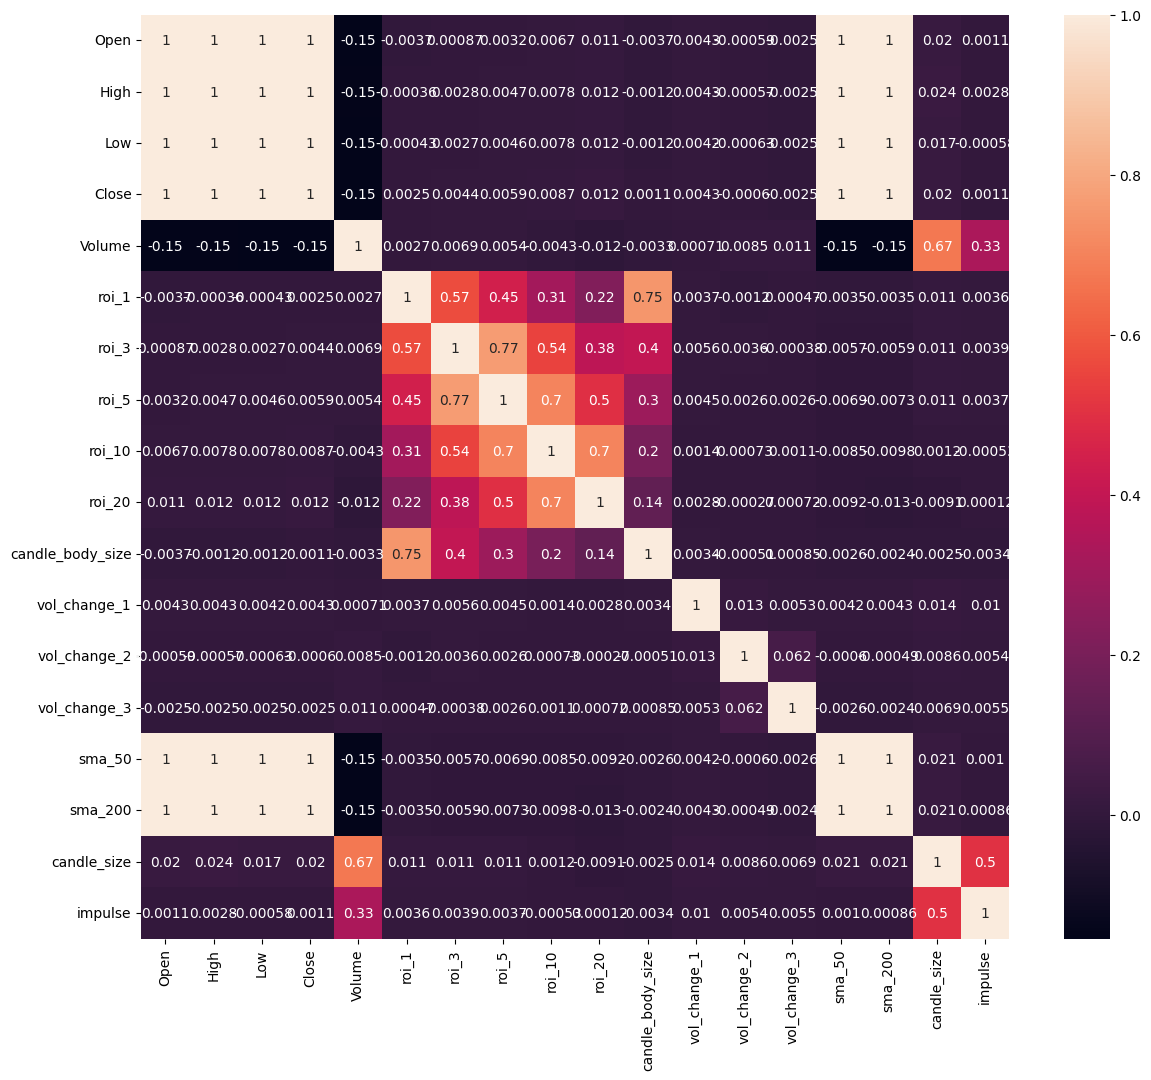

In [74]:
plt.figure(figsize=(14, 12))
corr = data[OHLCV + INDICATORS].corr()
sns.heatmap(corr, annot=True)

Korelacja OHLCV

<Axes: >

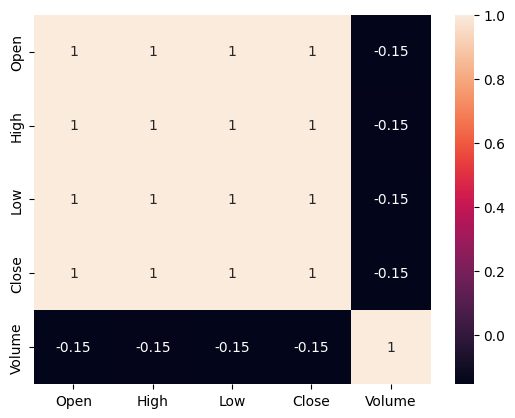

In [75]:
corr = data[OHLCV].corr()
sns.heatmap(corr, annot=True)

Korelacja ROI

<Axes: >

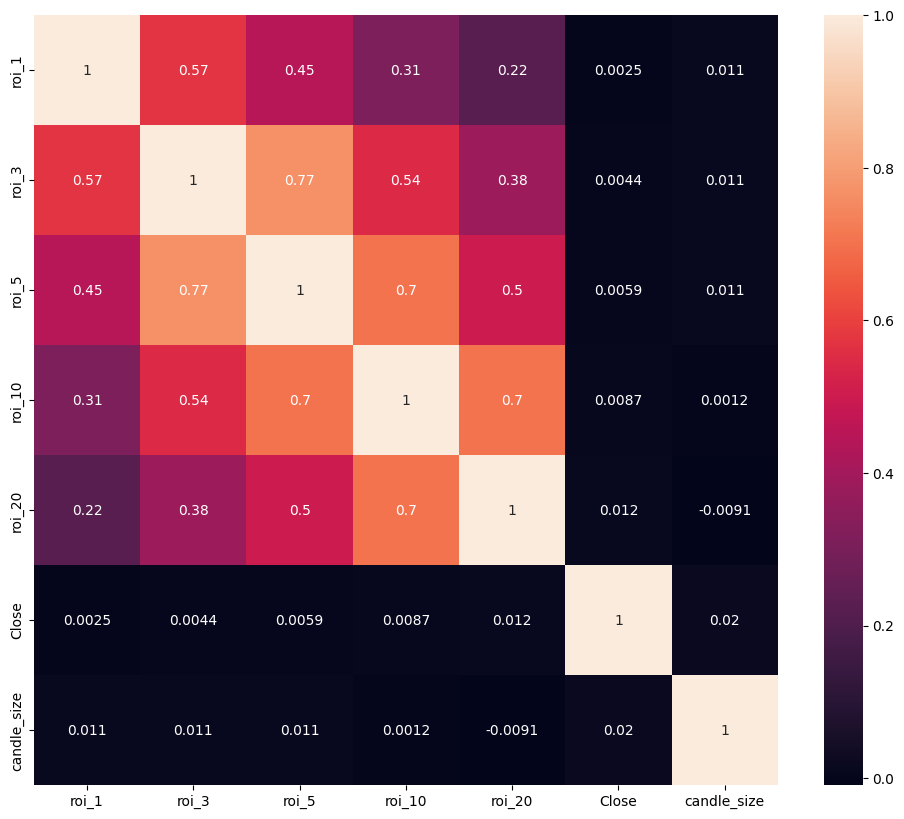

In [76]:
# wykres korelacji
plt.figure(figsize=(12, 10))
corr = data[ROI + ['Close', 'candle_size']].corr()
sns.heatmap(corr, annot=True)
# heatmap

<Axes: >

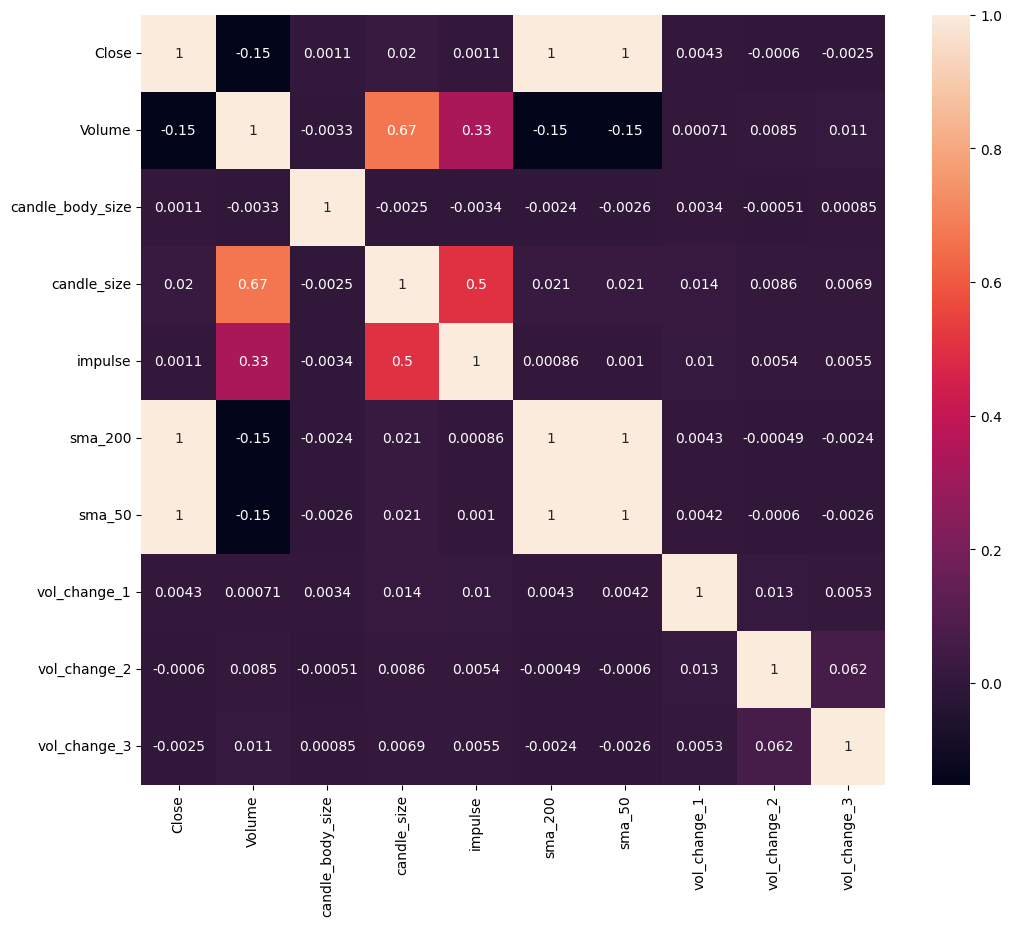

In [77]:
plt.figure(figsize=(12, 10))
indic_without_roi = list(set(INDICATORS).difference(ROI))
indic_without_roi.sort()
corr = data[['Close', 'Volume'] + indic_without_roi].corr()
sns.heatmap(corr, annot=True)


In [61]:
data.corr().loc[OHLCV + INDICATORS, ['target_value', 'target_direction']].T.to_clipboard()

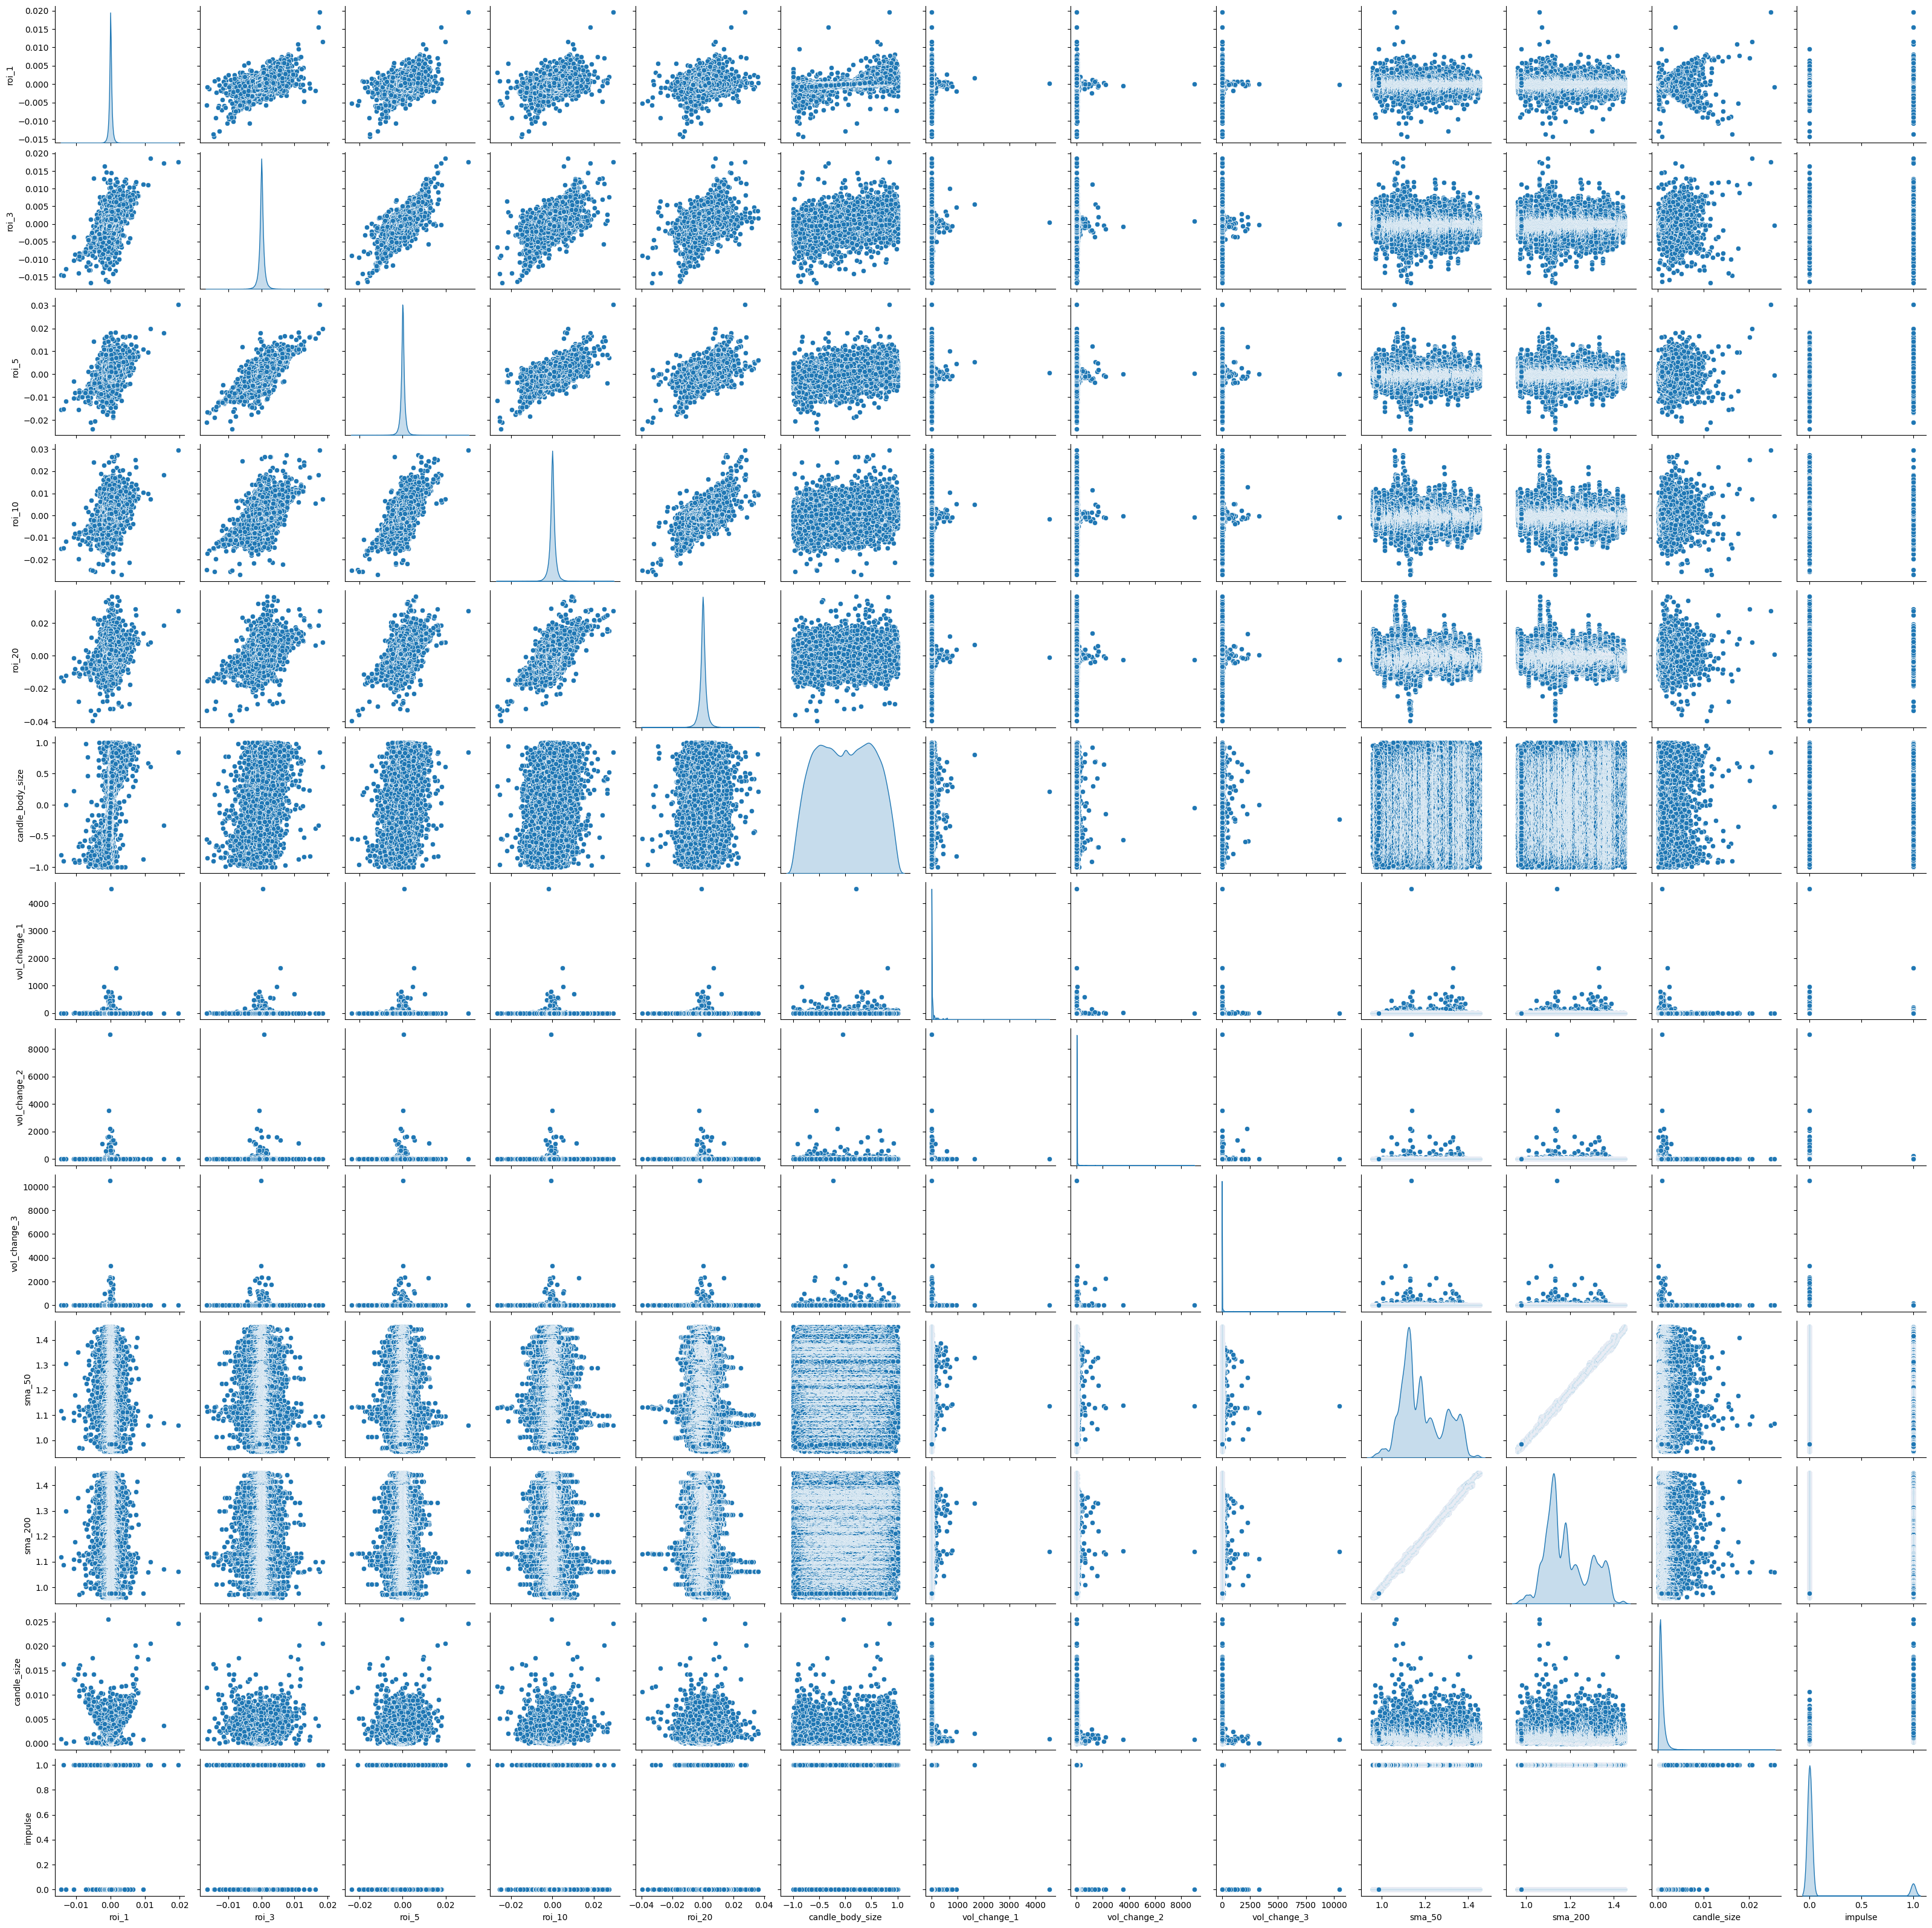

In [51]:
sns.pairplot(data=data[INDICATORS], diag_kind='kde')

## Boxploty

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'OHLC wykres pudełkowy'}>

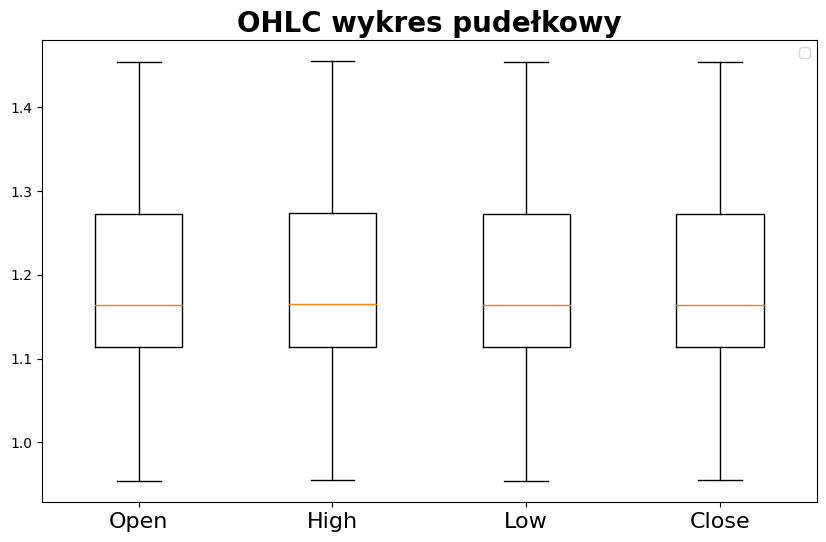

In [83]:
ohlc = OHLCV.copy()
ohlc.remove("Volume")
BoxPlot(w=10, h=6).plot(title="OHLC wykres pudełkowy", y=data[ohlc], labels=ohlc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Volume wykres pudełkowy'}>

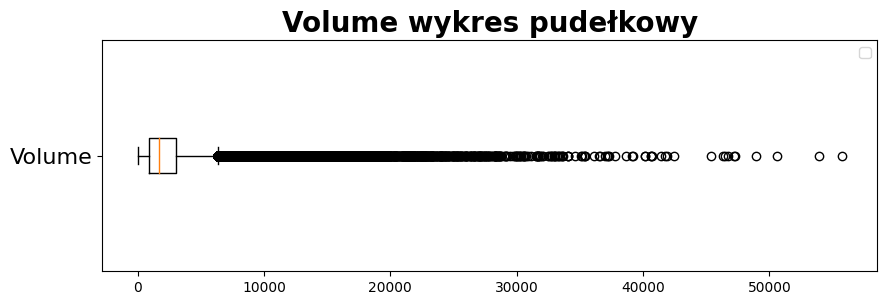

In [84]:
BoxPlot(w=10, h=3).plot(y=data["Volume"], title="Volume wykres pudełkowy", labels=["Volume"], vert=0)

liczba outlierów

In [86]:
q_1, q_3 = data['Volume'].quantile(0.25), data['Volume'].quantile(0.75)
outliers = data['Volume'] > (q_3 + 1.5*(q_3 - q_1))
print(f"number of outliers: {sum(outliers)} which is {sum(outliers)/outliers.shape[0]}") 

number of outliers: 13820 which is 0.04986739314774388


In [87]:
(q_3 + 1.5*(q_3 - q_1))

6317.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'ROI wykres pudełkowy'}>

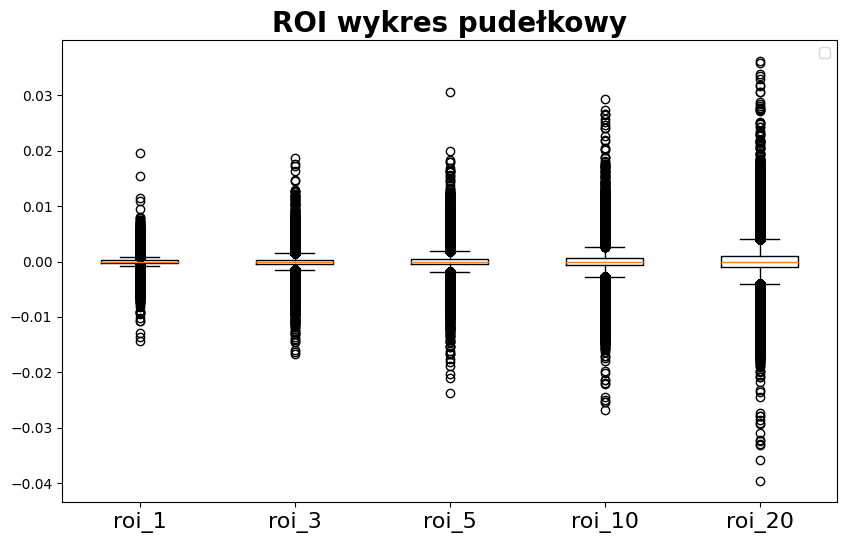

In [88]:
BoxPlot(legend=True, w=10, h=6).plot(title="ROI wykres pudełkowy", y=data[ROI], labels=ROI)

Wartości są tak małe, że boxplot ma problem z dobraniem skali i nie jest w stanie przedstawić ROI_k na wykresie pudełkowym.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


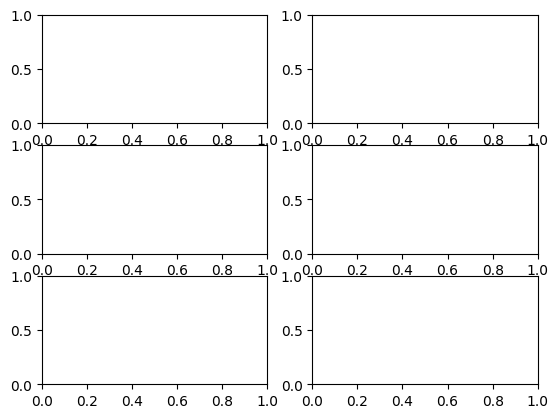

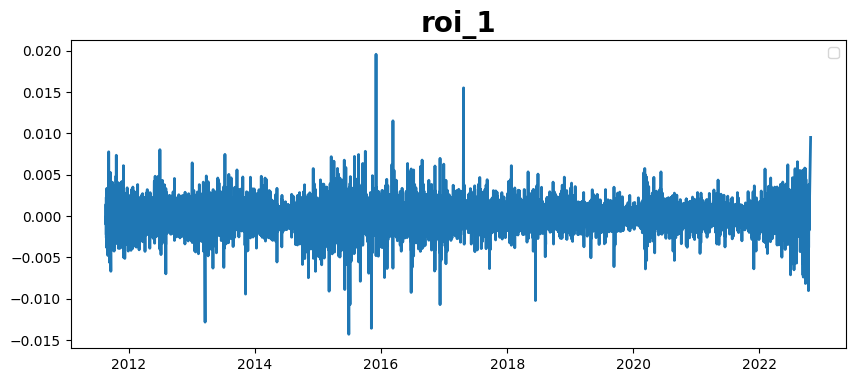

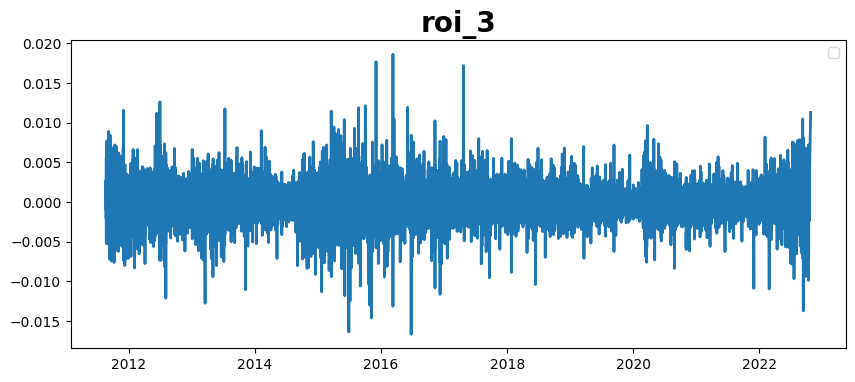

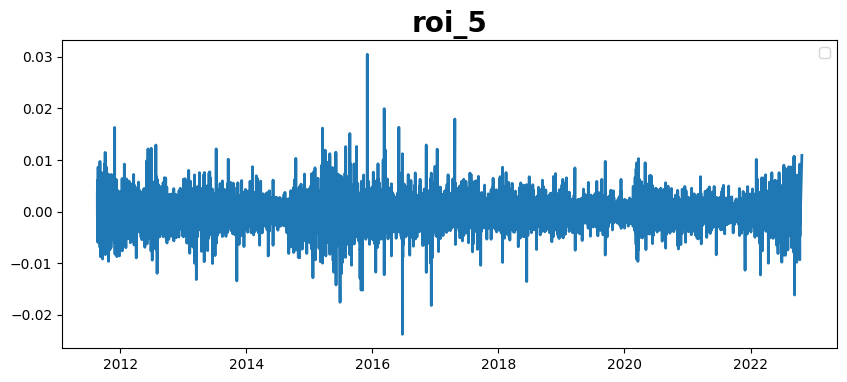

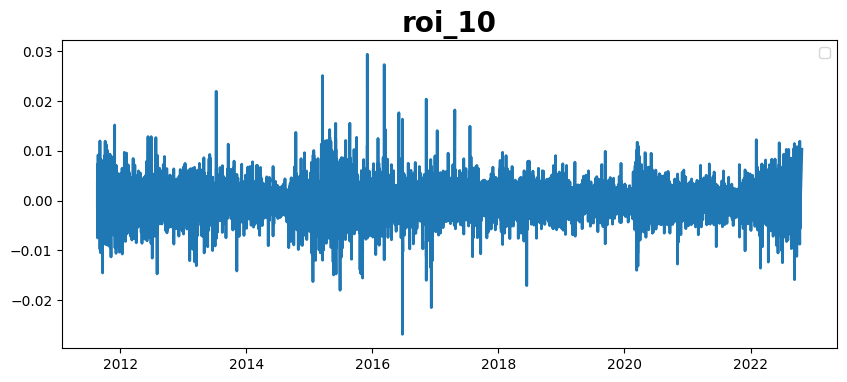

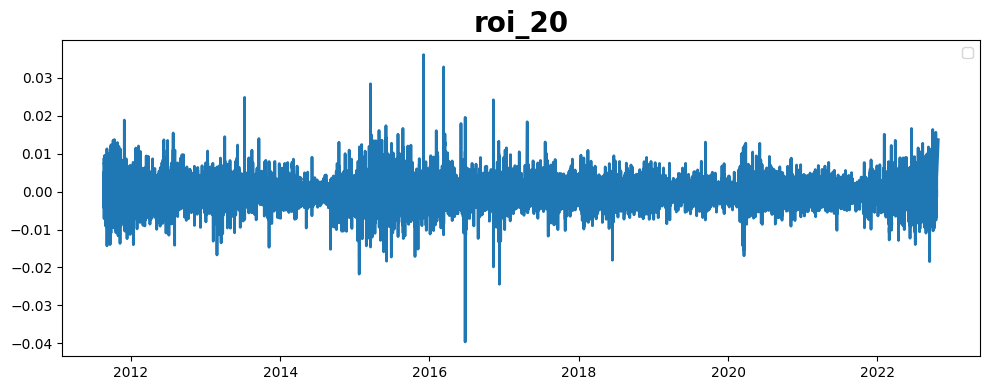

In [89]:
fig, axs = plt.subplots(3, 2)
for i, r in enumerate(ROI):
    row, col = i // 2, i % 2
    lp = LinearPlot(w=10, h=4).plot(data[r].index, data[r], title=r)

plt.tight_layout()

NameError: name 'roi' is not defined

## Wykresy rozkładów

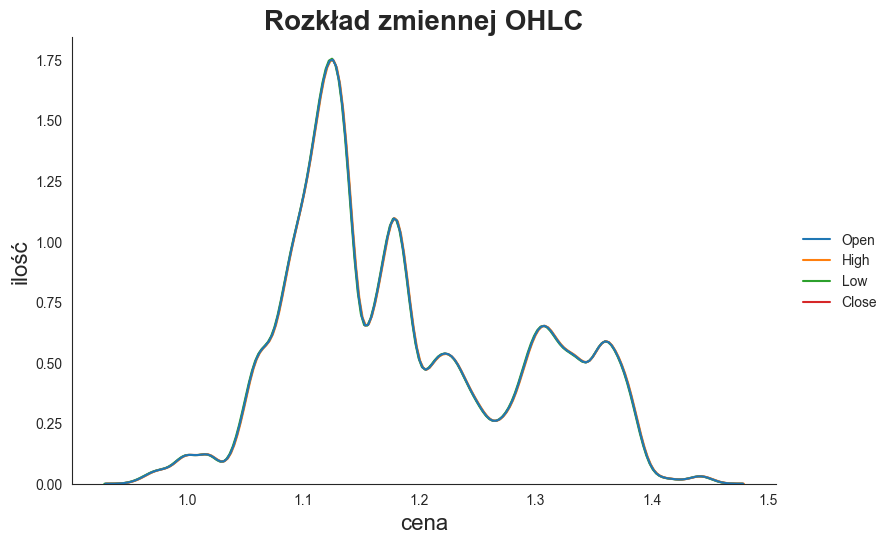

In [94]:
dp = DistPlot(h=5, w=8)
dp.plot(data[OHLCV[:-1]], title=f"Rozkład zmiennej OHLC",  xlabel="cena", ylabel="ilość")

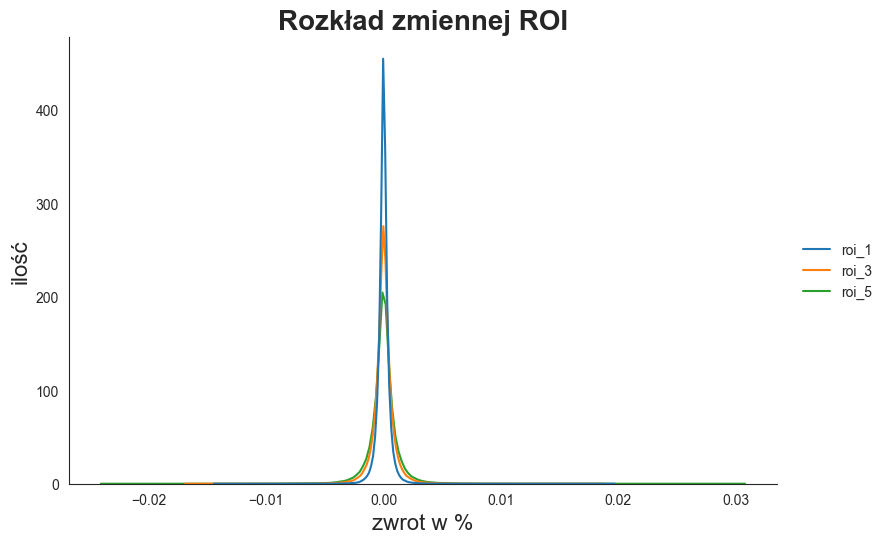

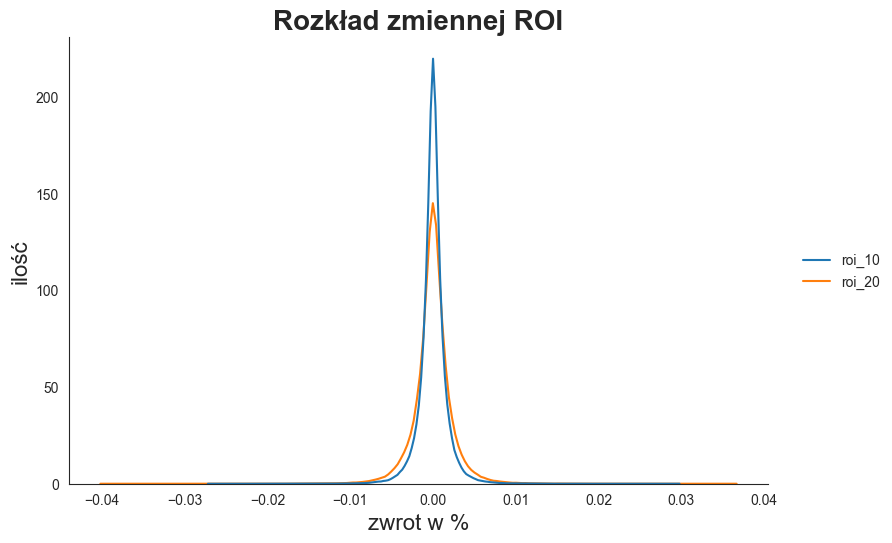

In [95]:
dp.plot(data[ROI[:3]], title=f"Rozkład zmiennej ROI", xlabel="zwrot w %", ylabel="ilość")
dp.plot(data[ROI[3:]], title=f"Rozkład zmiennej ROI", xlabel="zwrot w %", ylabel="ilość")

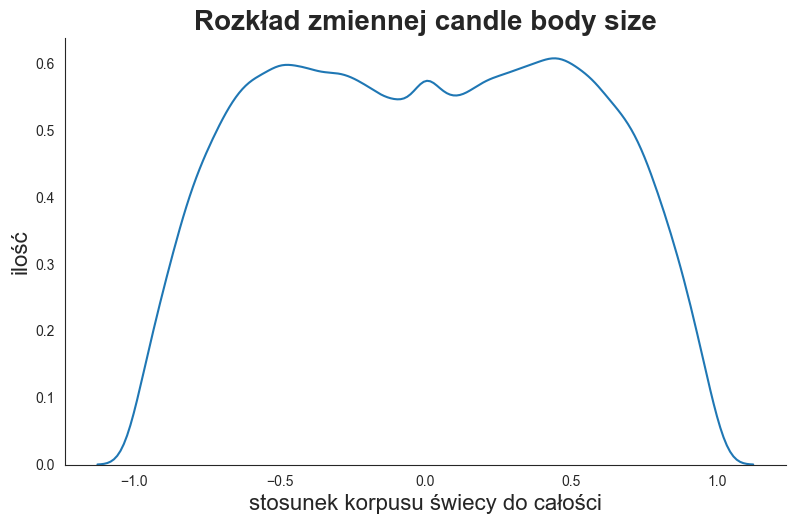

In [96]:
dp.plot(data['candle_body_size'], title=f"Rozkład zmiennej candle body size", xlabel="stosunek korpusu świecy do całości", ylabel="ilość")

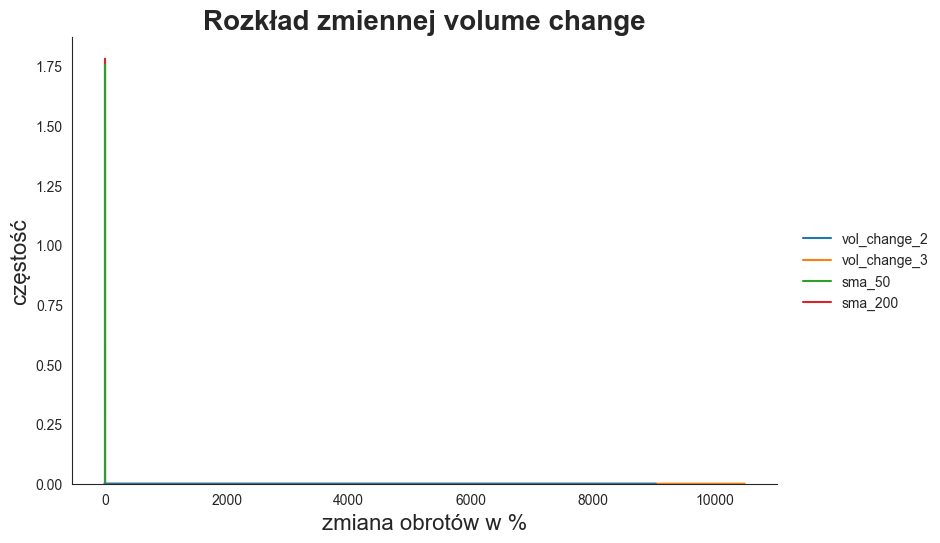

In [97]:
dp.plot(data[INDICATORS[7:11]], title=f"Rozkład zmiennej volume change", xlabel="zmiana obrotów w %", ylabel="częstość")

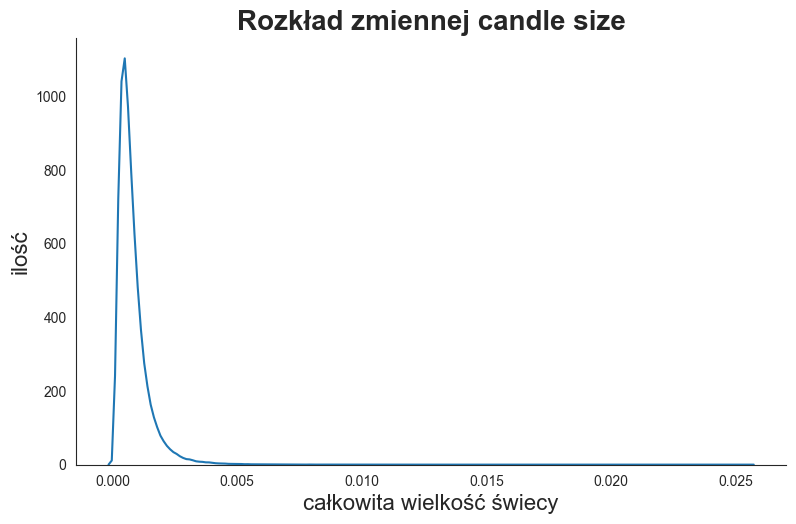

In [98]:
dp.plot(data['candle_size'], title=f"Rozkład zmiennej candle size", xlabel="całkowita wielkość świecy", ylabel="ilość")

## Badanie normalności zmiennej objaśnianej

Korelacja zmiennej endogenicznej z pozostałymi zmiennymi

In [99]:
Y = data['target_value']

In [100]:
Y.describe()

count    277135.000000
mean          1.187428
std           0.100095
min           0.954520
25%           1.113840
50%           1.164200
75%           1.272945
max           1.454150
Name: target_value, dtype: float64

<Axes: title={'center': 'Wykres pudełkowy zmiennej objaśnianej'}>

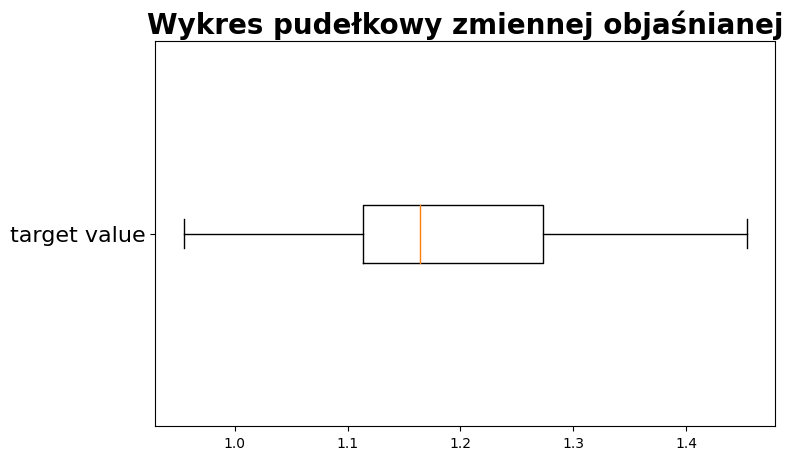

In [105]:
bp = BoxPlot(legend=False, w=8, h=5)
bp.plot(Y.values, title="Wykres pudełkowy zmiennej objaśnianej", vert=0, labels=['target value'])

<Axes: title={'center': 'Korelacji target_value z zmiennymi egzogenicznymi'}>

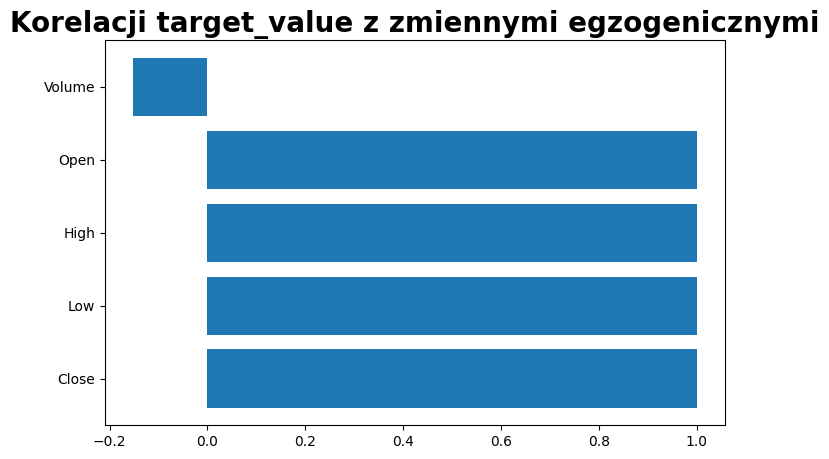

In [109]:
Y_corr_ohlc = data[OHLCV + ['target_value']].corr()['target_value'].sort_values(ascending=False).drop('target_value')
brp = BarPlot(legend=False, w=8, h=5)
brp.plot(Y_corr_ohlc.index, Y_corr_ohlc, title="Korelacji target_value z zmiennymi egzogenicznymi",vert=True)

In [110]:
Y_corr_ind = data[INDICATORS + ['target_value']].corr()['target_value'].sort_values(ascending=False).drop('target_value')
brp.plot(Y_corr_ind.index, Y_corr_ind, title="Korelacji target_value z zmiennymi egzogenicznymi", vert=True)

<Axes: title={'center': 'Korelacji target_value z zmiennymi egzogenicznymi'}>

## Badanie stacjonarności, trendu, sezonowości, autokorelacji zmiennej endogenicznej

In [111]:
Y = data['target_value']

Badanie normalności testem Kołmogrova-Smirnowa

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Rozkład zmiennej target_value'}, xlabel='cena', ylabel='ilość'>

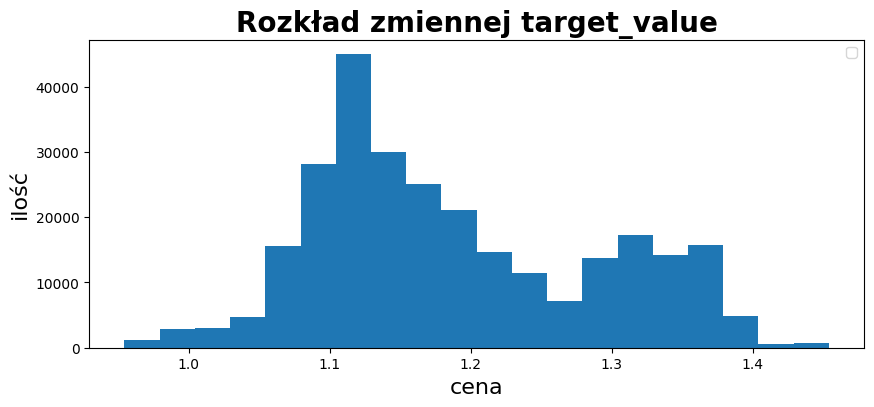

In [116]:
HistPlot().plot(Y, title=f"Rozkład zmiennej target_value", xlabel="cena", ylabel="ilość")

In [117]:
kstest(Y, 'norm')

KstestResult(statistic=0.832663844953376, pvalue=0.0, statistic_location=0.99015, statistic_sign=-1)

<Axes: title={'center': 'Zmiana target_value w czasie'}, xlabel='czas', ylabel='target_value'>

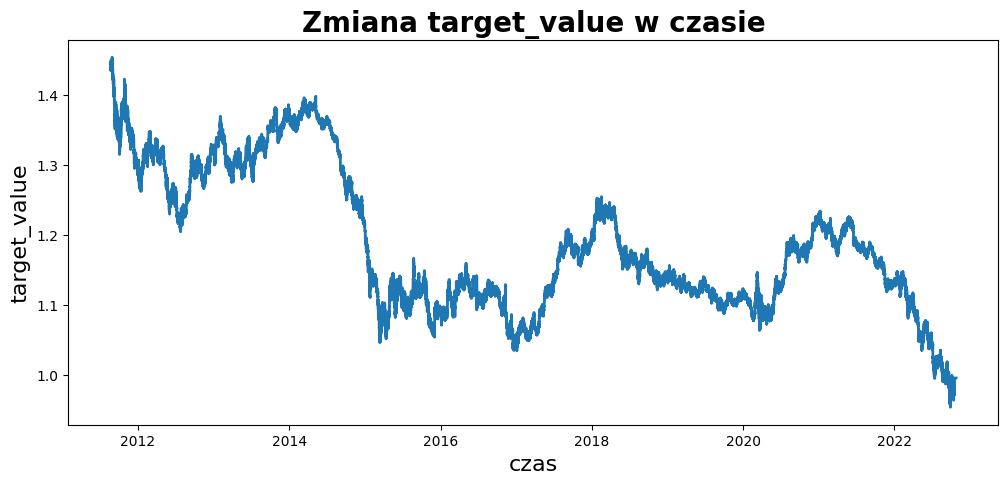

In [122]:
LinearPlot(h=5, w=12, legend=False).plot(data.index, Y,title=f"Zmiana target_value w czasie", xlabel="czas", ylabel="target_value")

Badanie stacjonarności rozszerzonym testem Dickeya-Fullera
- H0: non-stationary
- H1: stationary

In [123]:
adfuller(Y)

(-2.033444155483642,
 0.2721041984724881,
 20,
 277114,
 {'1%': -3.4303735980880625,
  '5%': -2.8615504300586743,
  '10%': -2.5667755515424577},
 -3288734.271936048)

Badanie stacjonarności testem KPSS, 
- H0: trend is stationary
- H1: is non-stationary

In [124]:
kpss(Y)

/Users/sebastiansukiennik/.pyenv/versions/3.9.6/envs/BACH/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(44.0912464692536,
 0.01,
 304,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

ACF and PACF

<Axes: title={'center': 'PACF dla target_value'}>

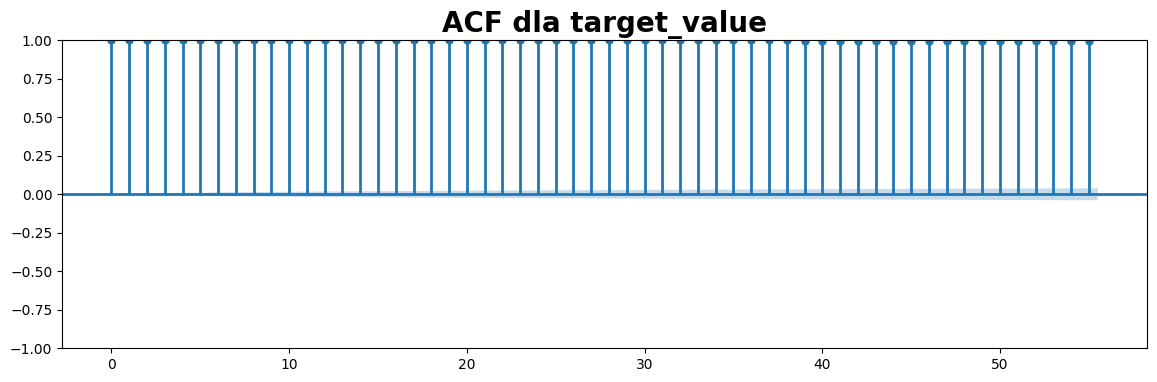

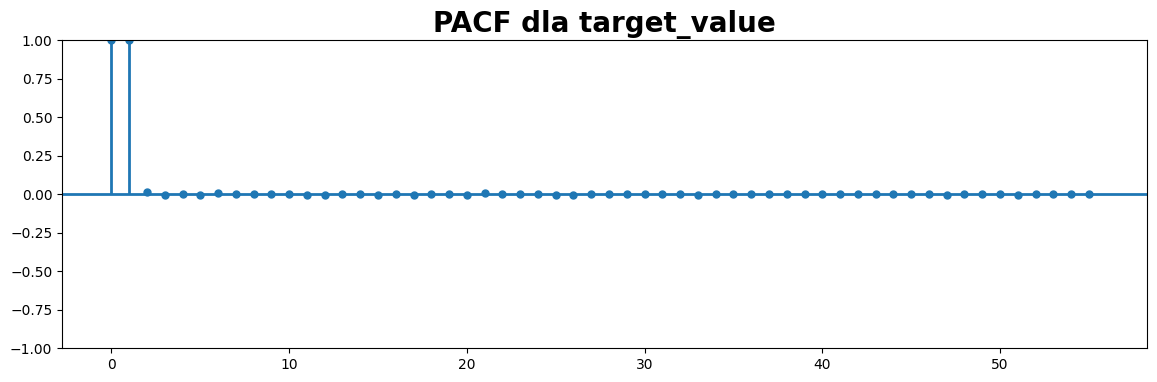

In [142]:
ACFPlot(legend=False, w=14).plot(data['target_value'], title="ACF dla target_value")
ACFPlot(legend=False, w=14).plot(data['target_value'], title="PACF dla target_value", partial=True)

## Wybór statystyki błędu